In [4]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#style
sns.set(style="darkgrid")

Uniremos primero lo scrapeado con nuestra data homicidios:

* con las coordenadas hemos scrapeado los barrios
* con el numero de comunas hemos scrapeado sus nombres

In [61]:
#Leemos el archivo reviews.parquet en un DataFrame
homicidiosdf = pq.read_table("../0-DATA/homicidiosEDAunion.parquet").to_pandas()
homicidiosdf

,Id,Victimas,Hora,Lugar,Calle,Longitud,Latitud,Acusado,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Barrio,nombre_comuna,url_imagen
0,2016-0002,1,1,GRAL PAZ,"PAZ, GRAL. AV.",-58.508775,-34.669777,PASAJEROS,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,Mataderos,"Liniers, Mataderos y Parque Avellaneda",https://buenosaires.gob.ar/sites/default/files...
1,2016-0003,1,7,AVENIDA,ENTRE RIOS AV.,-58.390403,-34.631894,AUTO,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,Constitución,"Retiro, San Nicolás, Puerto Madero, San Telmo,...",https://buenosaires.gob.ar/sites/default/files...
2,2016-0004,1,0,AVENIDA,LARRAZABAL AV.,-58.465039,-34.680930,AUTO,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,Villa Lugano,"Villa Soldati, Villa Riachuelo y Villa Lugano",https://buenosaires.gob.ar/sites/default/files...
3,2016-0005,1,5,AVENIDA,SAN JUAN AV.,-58.387183,-34.622466,PASAJEROS,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,Constitución,"Retiro, San Nicolás, Puerto Madero, San Telmo,...",https://buenosaires.gob.ar/sites/default/files...
4,2016-0008,1,18,AVENIDA,27 DE FEBRERO AV.,-58.444513,-34.684759,OBJETO FIJO,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,Villa Riachuelo,"Villa Soldati, Villa Riachuelo y Villa Lugano",https://buenosaires.gob.ar/sites/default/files...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2021-0093,1,17,AVENIDA,RIESTRA AV.,-58.433538,-34.645616,AUTO,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,Nueva Pompeya,Flores y Parque Chacabuco,https://buenosaires.gob.ar/sites/default/files...
695,2021-0094,1,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",-58.467398,-34.651178,AUTO,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,Parque Avellaneda,"Liniers, Mataderos y Parque Avellaneda",https://buenosaires.gob.ar/sites/default/files...
696,2021-0095,1,0,AVENIDA,GAONA AV.,-58.472934,-34.619847,CARGAS,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,Flores,"Villa General Mitre, Villa Devoto, Villa del P...",https://buenosaires.gob.ar/sites/default/files...
697,2021-0096,1,10,AVENIDA,"PERON, EVA AV.",-58.470668,-34.650217,CARGAS,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,Parque Avellaneda,"Liniers, Mataderos y Parque Avellaneda",https://buenosaires.gob.ar/sites/default/files...


Analizaremos todas las columnas, columnas por columnas y despues su relacion entre ellas
* las columnas Latitud y Longitud no analizaremos ya que esas coordenadas lo usaremos en el mismo Dashboard
* La columna Id y url_imagen tampoco analizaremos ya que es un id correlativo y url son los links de las imagenes

In [6]:
#nuestras columnas son las siguientes
homicidiosdf.columns

Index(['Id', 'Victimas', 'Hora', 'Lugar', 'Calle', 'Longitud', 'Latitud',
       'Acusado', 'Año', 'Mes', 'Dia', 'Rol', 'Victima', 'Sexo', 'Edad',
       'Barrio', 'nombre_comuna', 'url_imagen'],
      dtype='object')

### Columna **Victimas** --> indica el numero de victimas por hecho en este caso por fila.

In [7]:
#vemos la cantidad de variables unicas en nuestra columna 'Victimas'
homicidiosdf["Victimas"].unique()

array([1, 2, 3], dtype=int64)

Grafica boxsplot

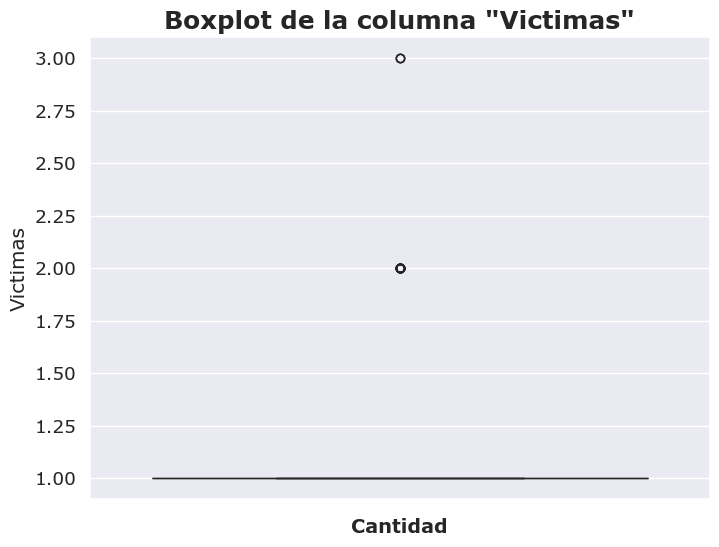

In [8]:
# Configurar estilo, paleta, fuente y escala de fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Crear el boxplot de la columna "SEXO"
plt.figure(figsize=(8, 6))
sns.boxplot(data=homicidiosdf, y="Victimas")

# Agregar título al gráfico
plt.title('Boxplot de la columna "Victimas"', fontsize=18, fontweight='bold')

# Etiqueta del eje x
plt.xlabel('Cantidad', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

Grafica barsplot

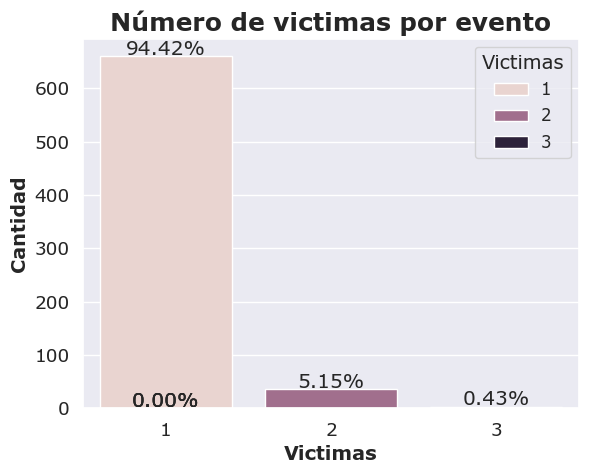

In [9]:
# Configurar estilo, paleta, fuente y escala de fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Crear el gráfico de barras
ax = sns.barplot(x=homicidiosdf["Victimas"].value_counts().index, 
                 y=homicidiosdf["Victimas"].value_counts().values, 
                 hue=homicidiosdf["Victimas"].value_counts().index)

# Agregar título al gráfico
plt.title('Número de victimas por evento', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Victimas', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad', fontsize=14, fontweight='bold')

# Ajustar leyenda
plt.legend(title='Victimas', title_fontsize='14', fontsize='12')

# Agregar porcentajes en cada columna
total = len(homicidiosdf)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total:.2%}', ha="center")

# Mostrar el gráfico
plt.show()


Como podemos analizar, la primera grafica 'boxsplot' no nos informa que en casi todos los accidentes solo a hadido una persona afectada y esto lo confirmamos con la segunda grafica 'barplot' en donde vemos que el 94.42% de los casos solo tiene 1 victima fatal.

### Columna **Hora** --> indica la hora que sucedio el hecho y esta en formato de 24h.

In [10]:
#podemos anamizar q estan todas las horas.
homicidiosdf["Hora"].unique()

array([ 1,  7,  0,  5, 18, 19, 15, 11, 22, 16,  9, 23,  6,  4, 10, 17, 12,
        8, 21, 20, 14,  3,  2, 13], dtype=int64)

Grafica histplot

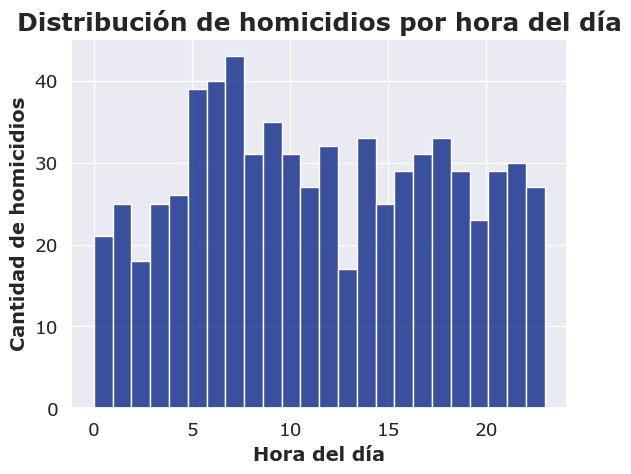

In [11]:
# Configurar estilo, paleta, fuente y escala de fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Crear el histograma
sns.histplot(data=homicidiosdf, x="Hora", bins=24) 

# Agregar título al gráfico
plt.title('Distribución de homicidios por hora del día', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Hora del día', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de homicidios', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()


Analizamos en la representacion de nuestra columna 'Hora' que en el horario desde las 6 horas a las 8 horas (en la mañana) se producen el mayor numero de accidentes, esto puede suceder devido a que es la hora donde se va al trabajo o comprar para el desayuno, la hora con mas actividad de la mañana, ademas analizamos que a las 14 horas hay una disminucion del numero de accidentes, esto puede ser deviso a que es la hora del almuerzo y muchos estan dentro de un recinto.

### Columna **Lugar** --> indica el area donde sucedío el hecho.

In [12]:
#podemos analizar que tiene 4 lugares
homicidiosdf["Lugar"].unique()

array(['GRAL PAZ', 'AVENIDA', 'CALLE', 'AUTOPISTA'], dtype=object)

Grafica pie

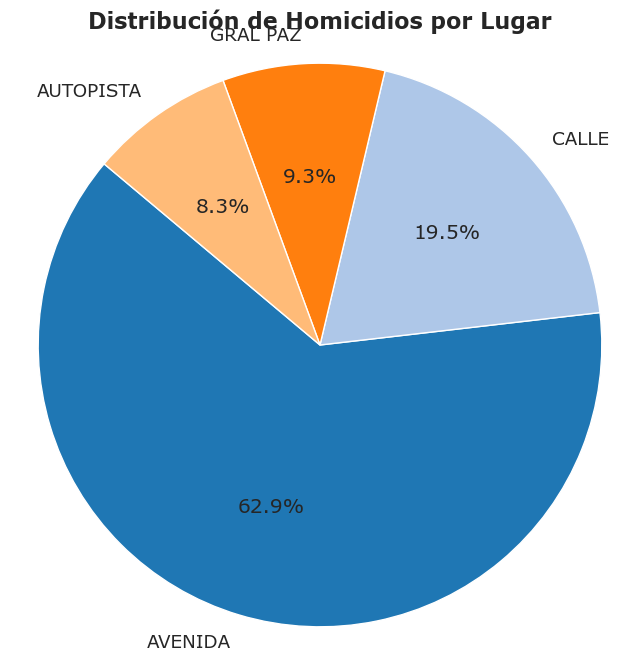

In [13]:
import matplotlib.pyplot as plt

# Agrupar y contar el número de homicidios por lugar
homicidios_por_lugar = homicidiosdf['Lugar'].value_counts()

# Seleccionar una paleta de colores
colores = plt.cm.tab20.colors  # Por ejemplo, usando la paleta de colores 'tab20'

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Definir el tamaño de la figura
plt.pie(homicidios_por_lugar,  # Datos a graficar
        labels=homicidios_por_lugar.index,  # Etiquetas para cada porción del pastel
        autopct='%1.1f%%',  # Formato para mostrar los porcentajes en las porciones
        startangle=140,  # Ángulo inicial de la primera porción (en grados, en sentido antihorario)
        colors=colores)  # Utilizar la paleta de colores seleccionada
plt.title('Distribución de Homicidios por Lugar', fontsize=16, fontweight='bold')  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo
plt.show()  # Mostrar el gráfico


Grafica countplot

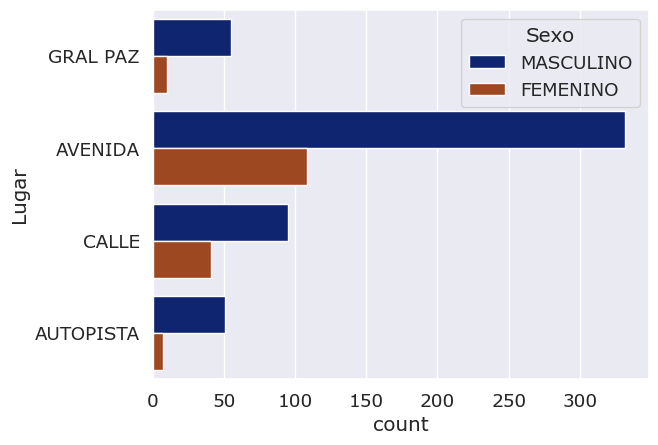

In [14]:
# Crear un gráfico de conteo (countplot) utilizando seaborn
# Se pasa el DataFrame 'homicidiosdf' como el conjunto de datos
# Se especifica que la variable 'Lugar' se usará en el eje y del gráfico
# Se utiliza la variable 'Sexo' para el parámetro hue, lo que permite diferenciar los géneros con diferentes colores
sns.countplot(data=homicidiosdf, y='Lugar', hue='Sexo')

# Mostrar el gráfico
plt.show()

Analizando las representaciones, podemos concluir que el mayor porcentaje de accidentes ocurre en las avenidas, esto puede deberse a que son vias de alta velocidad ademas que esta dentro de la urbe por tanto las interacciones entre automoviles, personas, clicistas, etc es mayor que en una autopista. Tambien notamos de la segunda grafica que el mayor numero de afectados en accidentes con los hombres, devido a que los hombres siempre estamos mas distraidos.

### Columna **Calle** --> indica el lugas mas exato donde ocurrio los accidentes.

In [15]:
#mostramos los valores unicos y vemos que son muchos.
homicidiosdf["Calle"].unique()

array(['PAZ, GRAL. AV.', 'ENTRE RIOS AV.', 'LARRAZABAL AV.',
       'SAN JUAN AV.', '27 DE FEBRERO AV.', 'NOGOYA', 'BELGRANO AV.',
       'SCALABRINI ORTIZ, RAUL AV.', 'REGIMIENTO DE PATRICIOS AV.',
       'ACOSTA, MARIANO', 'DE LA TORRE, LISANDRO', 'SUIPACHA',
       'DIRECTORIO AV.', '9 DE JULIO AV.', 'HOLMBERG', 'CURAPALIGUE AV.',
       'VIAMONTE', 'CABILDO AV.', 'ALCORTA, AMANCIO AV.',
       'CORRIENTES AV.', 'HERRERA', 'LAFUENTE AV.', 'MITRE, BARTOLOME',
       'DELLEPIANE, LUIS, TTE. GRAL.', 'MORENO, JOSE MARIA AV.', 'LIMA',
       'AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI', 'GORDILLO, TIMOTEO',
       'TRIUNVIRATO AV.', 'AUTOPISTA DELLEPIANE LUIS TTE. GRAL.',
       'CASTILLA, RAMON, MARISCAL', 'CAMPOS, LUIS M. AV.', 'CIUDADELA',
       'JUSTO, JUAN B. AV.', 'GAONA AV.', 'FIGUEROA ALCORTA, PRES. AV.',
       'MAGARI?OS CERVANTES, A.', 'SAN MARTIN AV.',
       'PERON, JUAN DOMINGO, TTE. GENERAL', 'DEL LIBERTADOR AV.',
       'LARRALDE, CRISOLOGO AV.', 'LA PLATA AV.',
       '

Grafica histplot

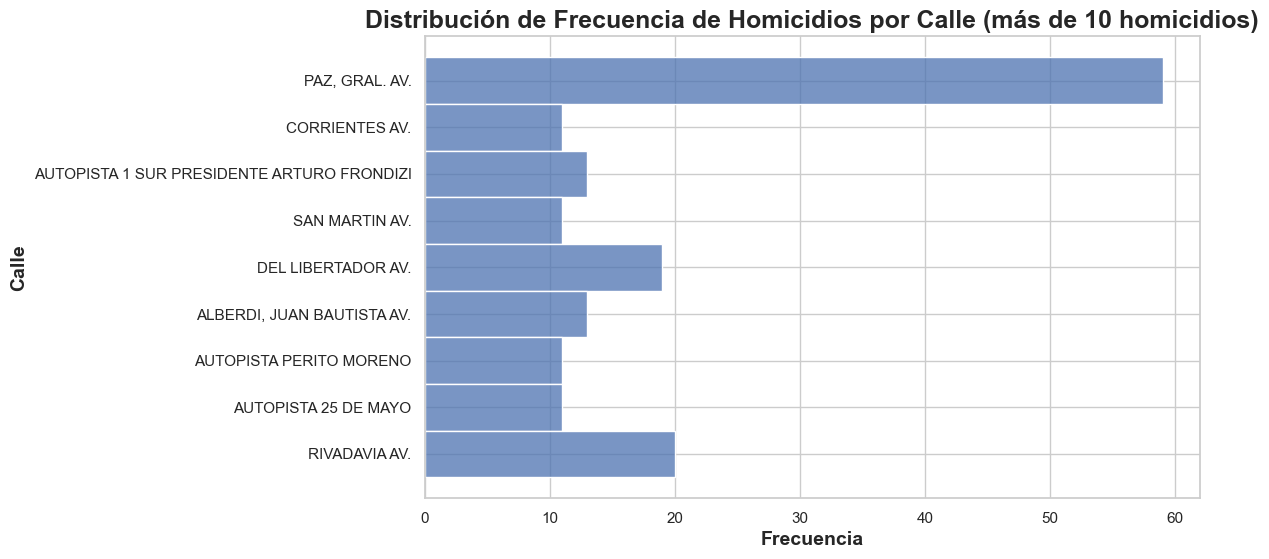

In [16]:
# Filtrar el DataFrame para incluir solo los barrios con más de 10 homicidios
barrios_con_mas_de_10_homicidios = homicidiosdf['Calle'].value_counts()[homicidiosdf['Calle'].value_counts() > 10].index.tolist()
df_filtrado = homicidiosdf[homicidiosdf['Calle'].isin(barrios_con_mas_de_10_homicidios)]

# Configurar el estilo y la paleta
sns.set(style="whitegrid")

# Crear el gráfico de distribución de frecuencia
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, y="Calle", bins=10)  

# Agregar título al gráfico
plt.title('Distribución de Frecuencia de Homicidios por Calle (más de 10 homicidios)', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Frecuencia', fontsize=14, fontweight='bold')
plt.ylabel('Calle', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

Podemos analizar de la grafica que a pesar del gran numero de calles, solo en agunas ocurre el mayor numero de homicidios, y con lo anteriormente analizado, aqui tambien vemos que las avenidas es el punto de mayor numero de homicidios, en particular la Av. Paz Gral, seguido pero muy lejops por las avenidas Rivadavia y Del Libertador.

### Columna **Acusado** --> indica el personaje y su papel en el cual ocacionaron el indicente de homicidio.

In [17]:
# aqui vemos  los tipod de personajes o moviles en el cual se produjo el accidente
homicidiosdf["Acusado"].unique()

array(['PASAJEROS', 'AUTO', 'OBJETO FIJO', 'CARGAS', 'MOTO', 'MULTIPLE',
       'OTRO', 'BICICLETA', 'TREN'], dtype=object)

Grafica countplot

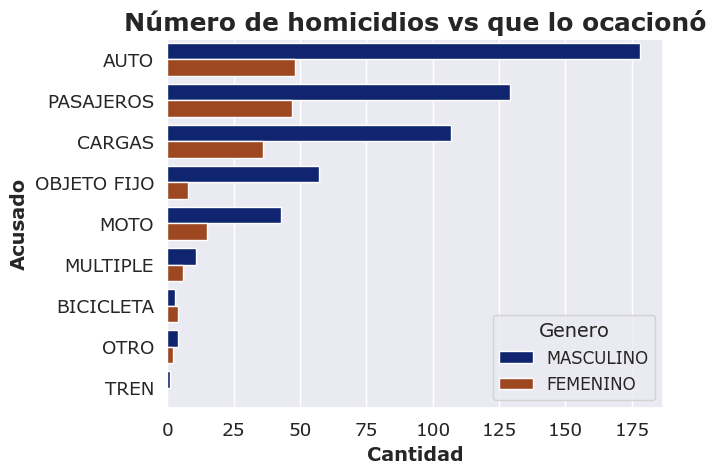

In [18]:
# Calcular el conteo de casos por cada categoría en la columna 'Acusado'
conteo_acusados = homicidiosdf['Acusado'].value_counts()

# Ordenar el DataFrame por los conteos de casos en orden descendente
homicidiosdf_ordenado = homicidiosdf.loc[homicidiosdf['Acusado'].isin(conteo_acusados.index)]

# Configurar el estilo, paleta de colores, fuente y escala de fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Crear el gráfico de barras utilizando seaborn countplot
sns.countplot(data=homicidiosdf_ordenado, y='Acusado', hue='Sexo', order=conteo_acusados.index)

# Agregar título al gráfico
plt.title('Número de homicidios vs que lo ocacionó', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Cantidad', fontsize=14, fontweight='bold')
plt.ylabel('Acusado', fontsize=14, fontweight='bold')

# Ajustar la leyenda
plt.legend(title='Genero', title_fontsize='14', fontsize='12')

# Mostrar el gráfico
plt.show()

Podemos extrapolar de nuestra grafica que el gran numero de homicidios fueron ocacionados y en gran intensidad seung puesto siguiente 1er: Autos, 2do: Pasajeros, 3ro: Cargas. ademas que los hombre son los mas afectados. tambien que en Tren o bicicleta son los dos metodos por los cuales hay menos homicidios ocacionados.

### Columna **Año** --> indica el años que sucedio los homicidios.

In [19]:
#tenemos años desde el 2016 al 2021
homicidiosdf["Año"].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

Grafica countplot

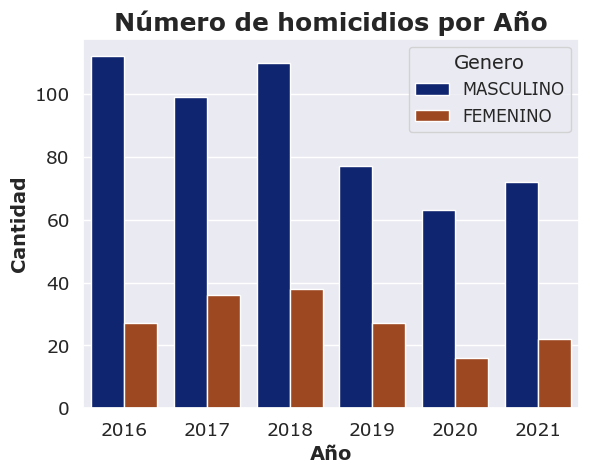

In [20]:
# Configurar el estilo, la paleta de colores, la fuente y la escala de la fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Crear el gráfico de barras utilizando seaborn countplot
sns.countplot(data=homicidiosdf, x='Año', hue='Sexo') 

# Agregar título al gráfico
plt.title('Número de homicidios por Año', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Año', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad', fontsize=14, fontweight='bold')

# Ajustar la leyenda
plt.legend(title='Genero', title_fontsize='14', fontsize='12')

# Mostrar el gráfico
plt.show()


De la grafica podemos concluir que el numero de homicidios desde el año 2016 al 2017 son altos, tieniendo una baja desde el 2019 al 2021, esto puede deberse a la situacion mundial de pan demia que habiamos vivido.

### Columna **Mes** --> indica el Mes que sucedio los homicidios.

In [21]:
#los valores unicos con los 12 meses
homicidiosdf["Mes"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

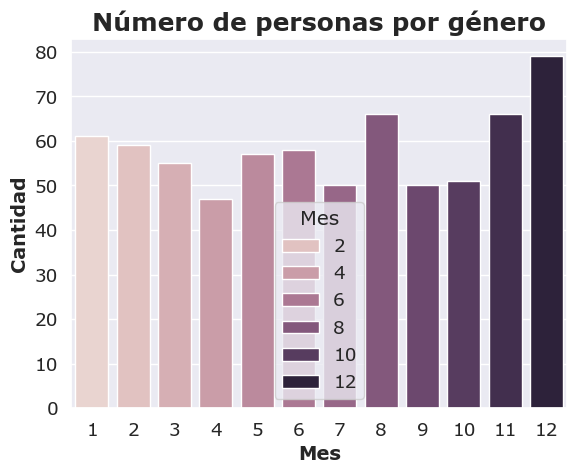

In [22]:
# Configurar estilo, paleta, fuente y escala de fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Crear el gráfico de barras
sns.barplot(x=homicidiosdf["Mes"].value_counts().index, 
            y=homicidiosdf["Mes"].value_counts().values, 
            hue=homicidiosdf["Mes"].value_counts().index)

# Agregar título al gráfico
plt.title('Número de personas por género', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Mes', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

De nuestro grafico podemos analizar que el gran numero de homicidios se representan en el mes de diciembre, esto debido a que por fiestas navideñas hay un gran movimiento de personas y se genera el caos y desorden. en agosto tambien es el segundo pico mas grande de homcidios y esto es debido a que en buenos aires para ese mes hay varios eventos como el dia del libertador san martin, dia del niño, festibal del tango, etc.

### Columna **Día** --> indica el día que sucedio los homicidios.

In [23]:
#los dias del mes
homicidiosdf["Dia"].unique()

array([ 2,  3, 10, 21, 24, 29,  8, 14, 15, 17, 28,  4, 12, 13, 19, 23, 30,
       31, 11, 20, 22, 25, 26, 16, 18, 27,  7,  9,  5,  6,  1],
      dtype=int64)

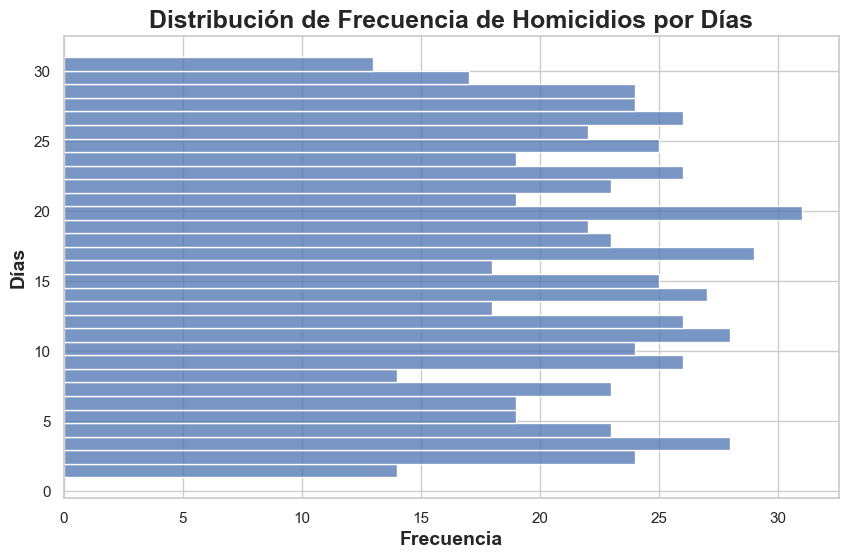

In [24]:
# Filtrar el DataFrame para incluir solo los barrios con más de 10 homicidios
barrios_con_mas_de_10_homicidios = homicidiosdf['Dia'].value_counts()[homicidiosdf['Dia'].value_counts() > 0].index.tolist()
df_filtrado = homicidiosdf[homicidiosdf['Dia'].isin(barrios_con_mas_de_10_homicidios)]

# Configurar el estilo y la paleta
sns.set(style="whitegrid")

# Crear el gráfico de distribución de frecuencia
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, y="Dia", bins=31)  

# Agregar título al gráfico
plt.title('Distribución de Frecuencia de Homicidios por Días', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Frecuencia', fontsize=14, fontweight='bold')
plt.ylabel('Días', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

De la grafica se puede extrapolar poco ya que no tiene un patron definido mas podemos dividirlo en 4 semanas y vemos que cada semana tienen picos de mayor accidente, esto puede ser devido a que salmen a consumir, comprar, dinero, ya que en la 1ra seman y 3ra semana son los picos de mayor incidentes de homicidio, pagos finde mes o quincena.

### Columna **Rol** --> indica el rol que complia la victima en el accidente.

In [25]:
homicidiosdf["Rol"].unique()

array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'CICLISTA'],
      dtype=object)

Grafica barplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


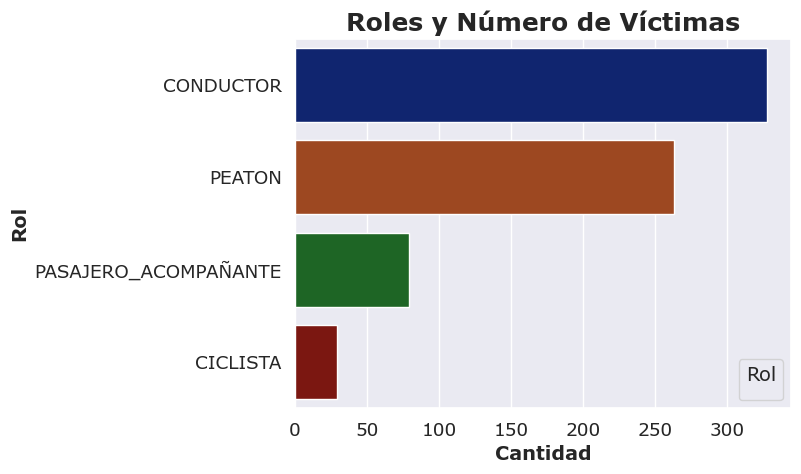

In [26]:
# Configurar estilo, paleta, fuente y escala de fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Crear el gráfico de barras
sns.barplot(y=homicidiosdf["Rol"].value_counts().index, 
            x=homicidiosdf["Rol"].value_counts().values, 
            hue=homicidiosdf["Rol"].value_counts().index)

# Agregar título al gráfico
plt.title('Roles y Número de Víctimas', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Cantidad', fontsize=14, fontweight='bold')
plt.ylabel('Rol', fontsize=14, fontweight='bold')

# Ajustar leyenda
plt.legend(title='Rol', title_fontsize='14', fontsize='12')

# Mostrar el gráfico
plt.show()

Grafica pie

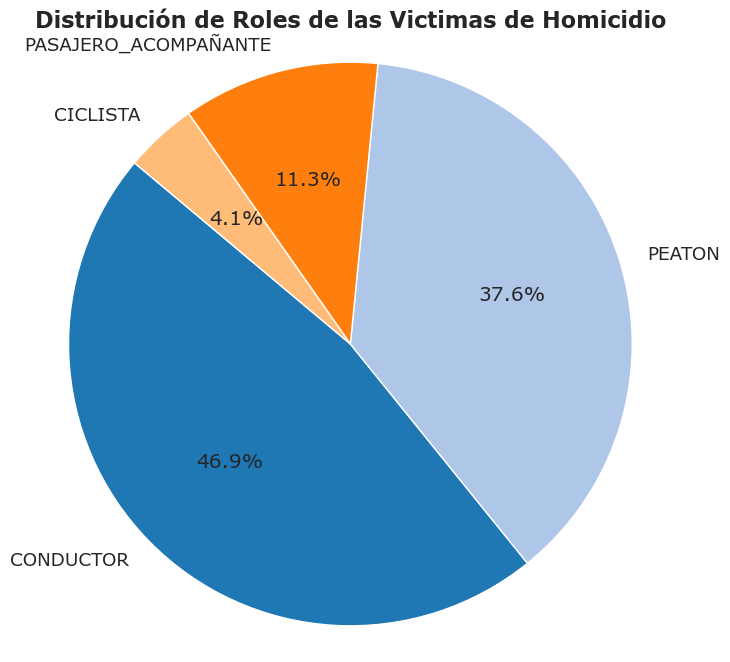

In [27]:
# Agrupar y contar el número de homicidios por lugar
homicidios_por_lugar = homicidiosdf['Rol'].value_counts()

# Seleccionar una paleta de colores
colores = plt.cm.tab20.colors  # Por ejemplo, usando la paleta de colores 'tab20'

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Definir el tamaño de la figura
plt.pie(homicidios_por_lugar,  # Datos a graficar
        labels=homicidios_por_lugar.index,  # Etiquetas para cada porción del pastel
        autopct='%1.1f%%',  # Formato para mostrar los porcentajes en las porciones
        startangle=140,  # Ángulo inicial de la primera porción (en grados, en sentido antihorario)
        colors=colores)  # Utilizar la paleta de colores seleccionada
plt.title('Distribución de Roles de las Victimas de Homicidio', fontsize=16, fontweight='bold')  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo
plt.show()  # Mostrar el gráfico

De las Graficas podemos concluir que las victimas de homicidio tenian en mayor nuero el rol de conductor o peaton, esto concuerda con lo ya analizado de homicidios en las avenidas donde por el congestionamiento de personas y autos, estos son los mas afectados. podria deberse a que los conductores y los peatones estan cansados y distraidos cuando estan en movimiento. no por ende se deja de ladoa a los ciclistas o acompañantes se auto, ya que quizas no tienen los seguros necesarios de proteccion personal.

### Columna **Victima** --> indica en donde se estaba movilizando la victima.

In [28]:
homicidiosdf["Victima"].unique()

array(['AUTO', 'MOTO', 'PEATON', 'BICICLETA', 'PASAJEROS', 'MOVIL',
       'CARGAS'], dtype=object)

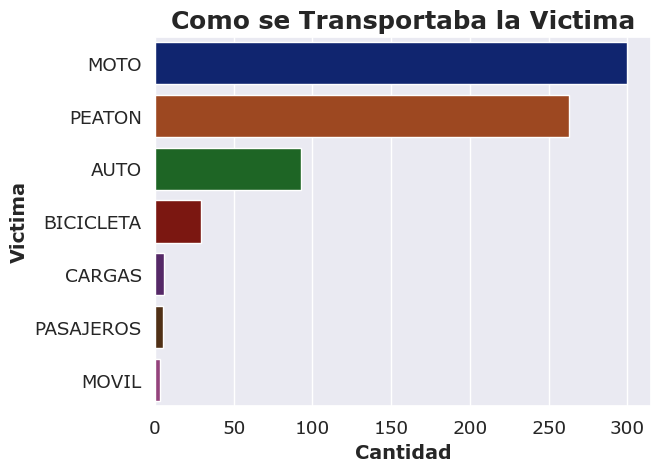

In [29]:
# Configurar estilo, paleta, fuente y escala de fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Crear el gráfico de barras
sns.barplot(y=homicidiosdf["Victima"].value_counts().index, 
            x=homicidiosdf["Victima"].value_counts().values, 
            hue=homicidiosdf["Victima"].value_counts().index)

# Agregar título al gráfico
plt.title('Como se Transportaba la Victima', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Cantidad', fontsize=14, fontweight='bold')
plt.ylabel('Victima', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

De la grafica podemos analizar que la victima se transportaba en moto o a pie, son los dos con mas victimas fatales.

### Columna **Sexo** --> indica el sexo de la victima.

In [30]:
#valores unicos de la columna
homicidiosdf["Sexo"].unique()

array(['MASCULINO', 'FEMENINO'], dtype=object)

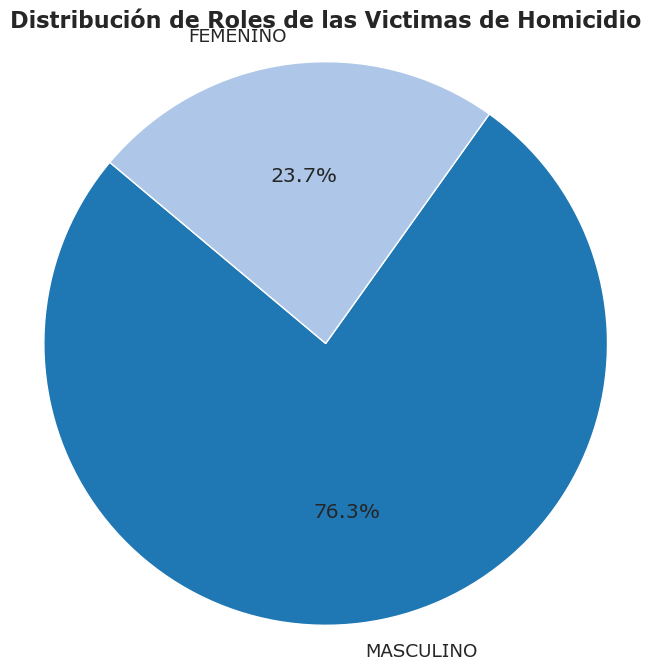

In [31]:
# Agrupar y contar el número de homicidios por sexo
homicidios_por_lugar = homicidiosdf['Sexo'].value_counts()

# Seleccionar una paleta de colores
colores = plt.cm.tab20.colors  # Por ejemplo, usando la paleta de colores 'tab20'

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Definir el tamaño de la figura
plt.pie(homicidios_por_lugar,  # Datos a graficar
        labels=homicidios_por_lugar.index,  # Etiquetas para cada porción del pastel
        autopct='%1.1f%%',  # Formato para mostrar los porcentajes en las porciones
        startangle=140,  # Ángulo inicial de la primera porción (en grados, en sentido antihorario)
        colors=colores)  # Utilizar la paleta de colores seleccionada
plt.title('Distribución de Roles de las Victimas de Homicidio', fontsize=16, fontweight='bold')  # Título del gráfico
plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo
plt.show()  # Mostrar el gráfico

De la grafica concluimos y respaldamos concluciones anteriores donde el hombre es el con mas numero de homicidios con el 76.3%

### Columna **Edad** --> indica la edad de la victima.

In [32]:
np.sort(homicidiosdf['Edad'].unique())

array([ 1,  4,  5,  7, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 95],
      dtype=int64)

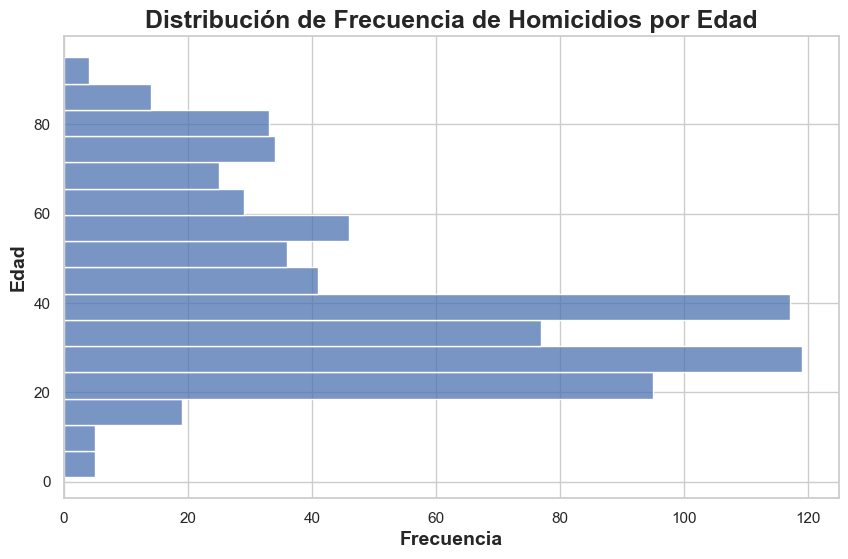

In [33]:
# Configurar el estilo y la paleta
sns.set(style="whitegrid")

# Crear el gráfico de distribución de frecuencia
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, y="Edad")#, bins=10)  

# Agregar título al gráfico
plt.title('Distribución de Frecuencia de Homicidios por Edad', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Frecuencia', fontsize=14, fontweight='bold')
plt.ylabel('Edad', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

Del grafico podemos extrapolar que las mayoria de victimas estan en el rango de 20 a 40 años de edad, esto puede pensarse por que es la edad donde uno sale a trabajar o sale a hacer mas vida social.

### Columna **Barrio** --> indica el barrio donde murió la victima.

In [34]:
#los Barrios
homicidiosdf['Barrio'].unique()

array(['Mataderos', 'Constitución', 'Villa Lugano', 'Villa Riachuelo',
       'Villa del Parque', 'Monserrat', 'Villa Crespo', 'Barracas',
       'Villa Soldati', 'Naon', 'San Nicolás', 'Parque Chacabuco',
       'Barrio Sarmiento', 'Saavedra', 'Nueva Pompeya', 'Balvanera',
       'Flores', 'Vicente López', 'Chacarita', 'Villa Urquiza', 'Palermo',
       'Vélez Sarsfield', 'Caballito', 'Recoleta', 'San Cristóbal',
       'Floresta', 'Villa General Mitre', 'Núñez', 'Liniers', 'Belgrano',
       'Almagro', 'Villa Devoto', 'Parque Avellaneda', 'Retiro',
       'Villa Ortúzar', 'Villa Luro', 'Villa Real', 'Boedo', 'La Boca',
       'Parque Patricios', 'La Paternal', 'Versalles', 'Villa Santa Rita',
       'Puerto Madero', 'Villa Pueyrredón', 'Agronomía', 'San Telmo',
       'Florida', 'Colegiales', 'Villa Martelli', 'Monte Castro',
       'Villa Industrial', 'Parque Chas', 'Coghlan',
       'Barrio El Triángulo'], dtype=object)

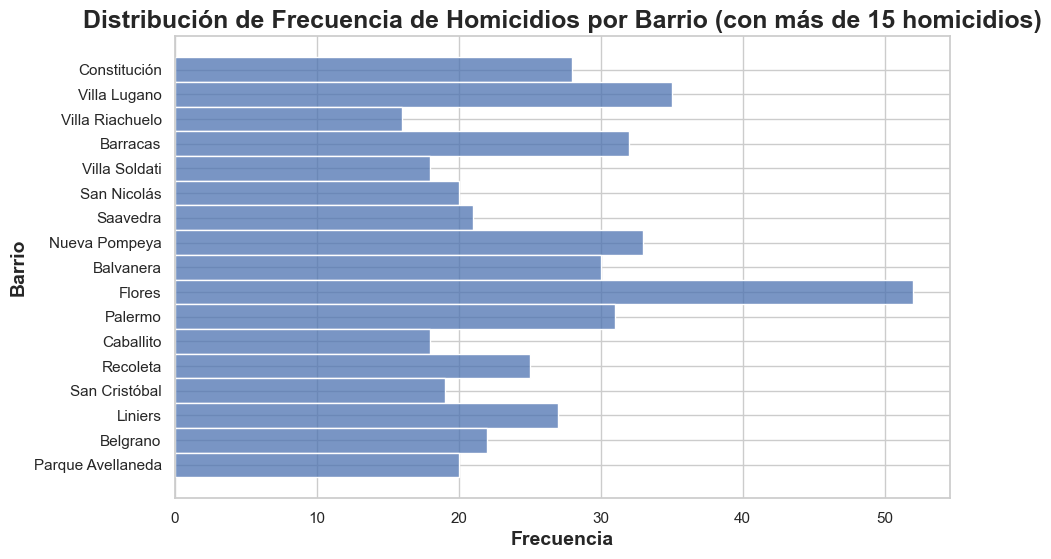

In [35]:
# Filtrar el DataFrame para incluir solo los barrios con más de 10 homicidios
barrios_con_mas_de_15_homicidios = homicidiosdf['Barrio'].value_counts()[homicidiosdf['Barrio'].value_counts() > 15].index.tolist()
df_filtrado = homicidiosdf[homicidiosdf['Barrio'].isin(barrios_con_mas_de_15_homicidios)]

# Configurar el estilo y la paleta
sns.set(style="whitegrid")

# Crear el gráfico de distribución de frecuencia
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, y="Barrio", bins=10)  

# Agregar título al gráfico
plt.title('Distribución de Frecuencia de Homicidios por Barrio (con más de 15 homicidios)', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Frecuencia', fontsize=14, fontweight='bold')
plt.ylabel('Barrio', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

De la grafica se visualiza que los barrios donde hay mas homicidios son: Flores, Villa lugano, Nueva Pompeya, Barracas, Palermo. zonas muy turisticas y con avenidas grandes.

### Columna **nombre_comuna** --> indica la comuna donde murió la victima.

In [36]:
homicidiosdf['nombre_comuna'].unique()

array(['Liniers, Mataderos y Parque Avellaneda',
       'Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución',
       'Villa Soldati, Villa Riachuelo y Villa Lugano',
       'Villa General Mitre, Villa Devoto, Villa del Parque y Villa Santa Rita',
       'Chacarita, Villa Crespo, La Paternal, Villa Ortúzar, Agronomía y Parque Chas',
       'La Boca, Barracas, Parque Patricios, y Nueva Pompeya',
       'Flores y Parque Chacabuco',
       'Coghlan, Saavedra, Villa Urquiza y Villa Pueyrredón',
       'Balvanera y San Cristóbal', 'Núñez, Belgrano y Colegiales',
       'Palermo',
       'Villa Real, Monte Castro, Versalles, Floresta, Vélez Sarsfield y Villa Luro',
       'Caballito', 'Recoleta', 'Almagro y Boedo'], dtype=object)

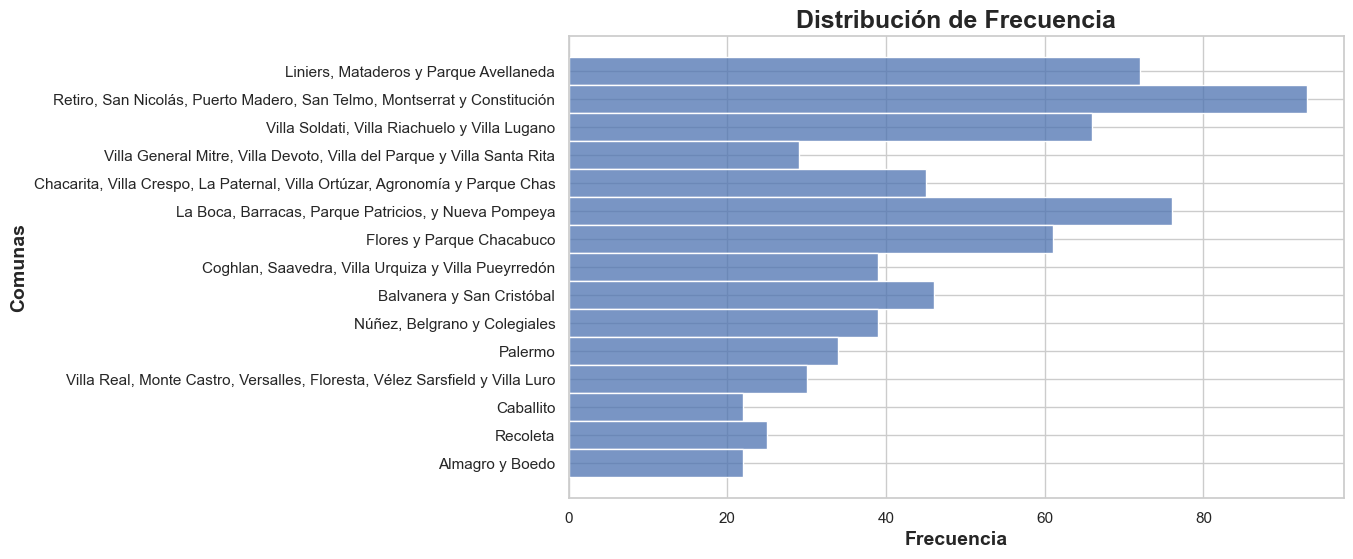

In [37]:
# Configurar el estilo y la paleta
sns.set(style="whitegrid")

# Crear el gráfico de distribución de frecuencia
plt.figure(figsize=(10, 6))
sns.histplot(data=homicidiosdf, y="nombre_comuna", bins=10)  # Reemplaza "columna" con el nombre de tu columna de interés

# Agregar título al gráfico
plt.title('Distribución de Frecuencia', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Frecuencia', fontsize=14, fontweight='bold')
plt.ylabel('Comunas', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

De esta grafica pordemos analizar que la comuna de liners, retiro, villa soldati, la boca son los lugares de mas victimas, y corresponde a los barrios y avenidas antes mensionadas.

### Ahora analizaremos las columnas y como entre ellas se relacionan

Grafica scatter de Edad vs Hora

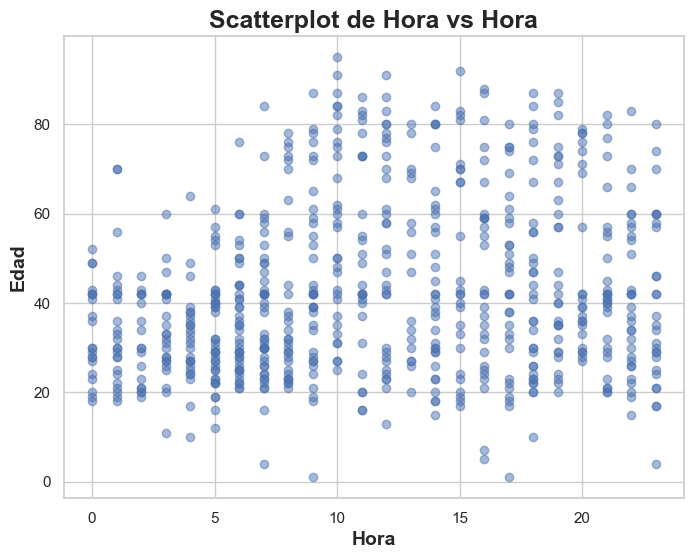

In [38]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el scatterplot
plt.scatter(homicidiosdf['Hora'], homicidiosdf['Edad'], alpha=0.5)

# Agregar título al gráfico
plt.title('Scatterplot de Hora vs Hora', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Hora', fontsize=14, fontweight='bold')
plt.ylabel('Edad', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

De la grafica podemos analizar que en efecto la edad de mas victimas es desde los 20 año a los 40, ademas que en la hora de la mañana es donde hay mas victimas dede las 5 a las 8 de la mañana

Grafica barplot de Año y Lugar

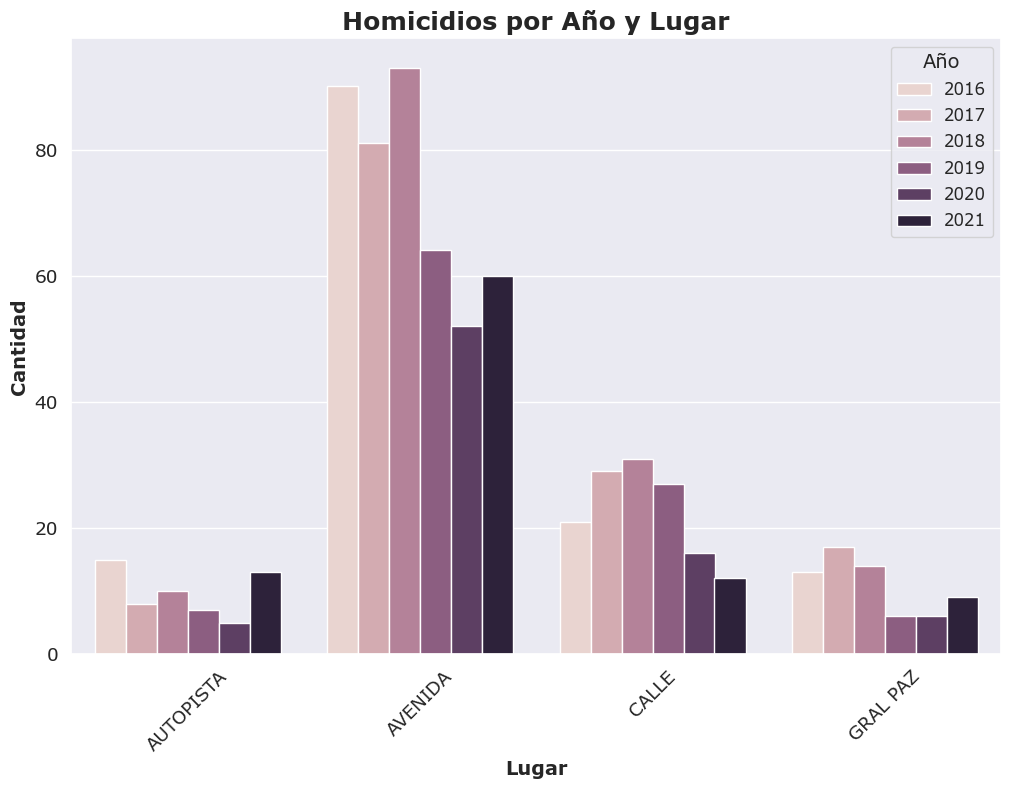

In [39]:
# Configurar estilo, paleta, fuente y escala de fuente en Seaborn
sns.set(style='darkgrid', palette='dark', font='Verdana', font_scale=1.2)

# Agrupar y contar el número de homicidios por año y lugar
homicidios_por_año_y_lugar = homicidiosdf.groupby(['Año', 'Lugar']).size().reset_index(name='Count')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=homicidios_por_año_y_lugar, x='Lugar', y='Count', hue='Año')

# Agregar título al gráfico
plt.title('Homicidios por Año y Lugar', fontsize=18, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Lugar', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad', fontsize=14, fontweight='bold')

# Ajustar leyenda
plt.legend(title='Año', title_fontsize='14', fontsize='12')

# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

De la grafica podemos concluir que la Avenida es un lugar donde se ocacionan la mayoria de las muertes por accidente, notamos un leve desenso es por la pandemia.

Grafica countplot de Sexo y Rol de la victima

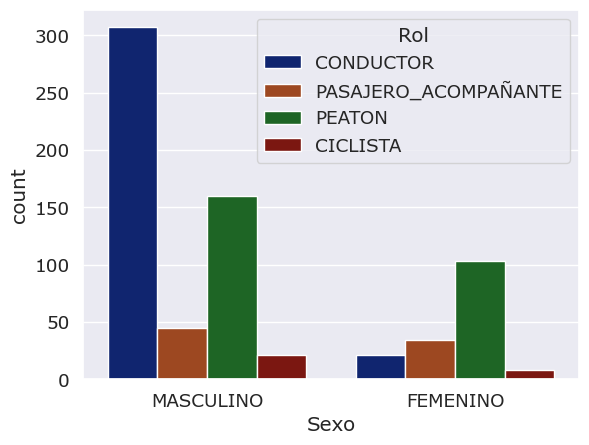

In [40]:
sns.countplot(data=homicidiosdf,x='Sexo',hue='Rol') 
plt.show()

Concluimos que el genero masculino es el de mayor numero de homicidios , aunque destacamos que en su mayoria como conductor. tambien destacamos que el peaton es el que mas sufre de accedentes de este tipo en ambos sexos.

Grafica boxplot Edad vs Victima

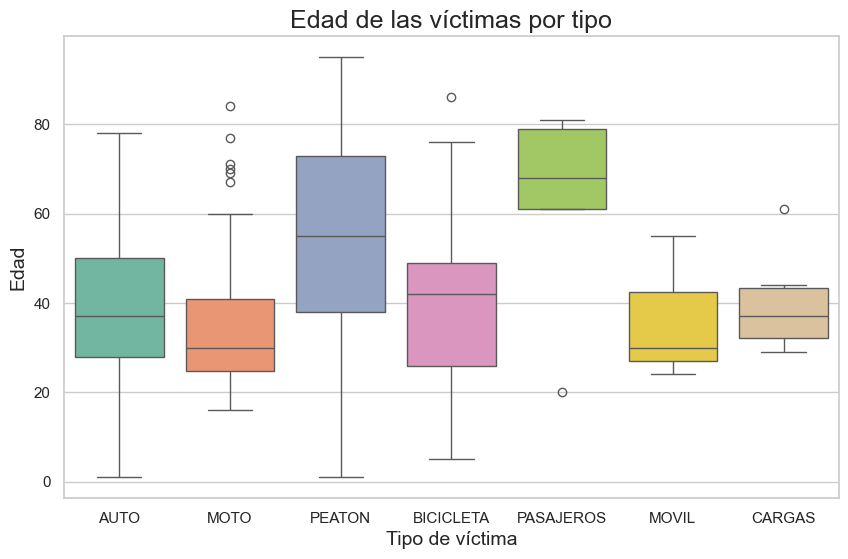

In [65]:
# Supongamos que tienes un DataFrame llamado 'homicidiosdf' con las columnas 'Victima' y 'Edad'

# Configurar estilo y tamaño de la figura
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Crear el boxplot con colores personalizados
sns.boxplot(data=homicidiosdf, x='Victima', y='Edad', palette='Set2')  # Puedes cambiar 'Set2' por cualquier paleta de colores disponible en Seaborn

# Agregar título al gráfico
plt.title('Edad de las víctimas por tipo', fontsize=18)

# Etiquetas de los ejes
plt.xlabel('Tipo de víctima', fontsize=14)
plt.ylabel('Edad', fontsize=14)

# Mostrar el gráfico
plt.show()

Podemos analizar esta grafica y visualizamos que la media de victimas en en auto es de 40 aprox de edad, el de moto es de 30 años aprox, el peaton cerca a los 55 años aprox, los Ciclistas de 42 años aprox, pasajeros 68 años aprox, movil cerca a los 30 años aprox y por carga 38 años aprox.

Mapa de Calor para ver las correlaciones de las variables numericas

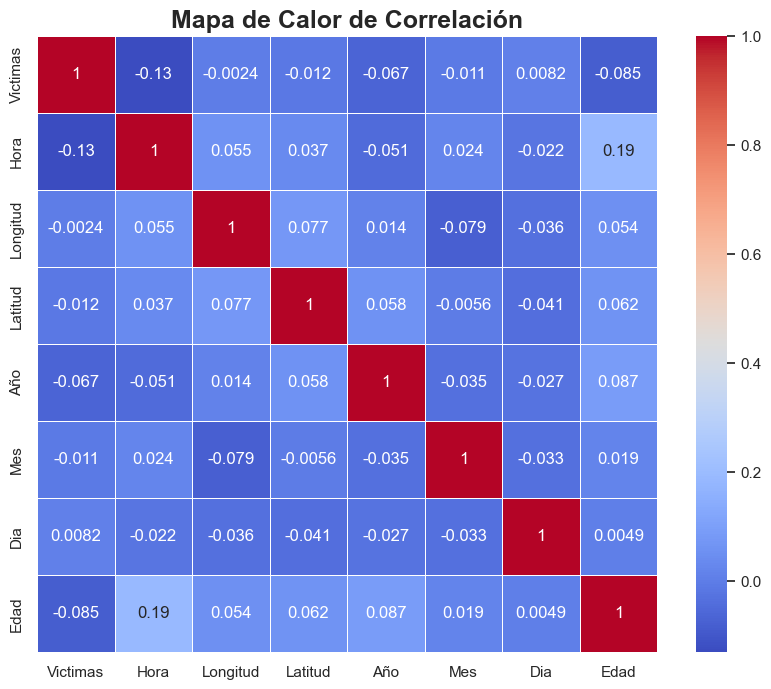

In [41]:
# Filtrar solo las columnas numéricas
df_numeric = homicidiosdf.select_dtypes(include=['int', 'float'])

# Configurar el estilo y la paleta
sns.set(style="whitegrid")

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Agregar título
plt.title('Mapa de Calor de Correlación', fontsize=18, fontweight='bold')

# Mostrar el mapa de calor
plt.show()

De la grafica podríamos concluir que las columnas no tienen relacion y por tanto no nos sirven mas no es asi ya que cada uno cumple una funcion como categoria dentro de nuestra busqueda de informcaion, no hay una donde si cambio su variable afecta directamente a otras, esto quiere decir que solo tenemos variables informativas.